<a href="https://colab.research.google.com/github/Kolexx/Economy_of_the_United_Kingdom-DAta-project/blob/main/coinmarketcap_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 #This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'11',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '4395e5cd-cf0f-4054-89b5-bf33af7d5b73',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


{'status': {'timestamp': '2024-08-04T16:15:50.326Z', 'error_code': 0, 'error_message': None, 'elapsed': 35, 'credit_count': 1, 'notice': None, 'total_count': 10066}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11621, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [ ]:
type(data)

dict

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11621,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.973551e+07,1.973551e+07,False,NaN,1,NaN,NaN,None,2024-08-04T16:15:00.000Z,59235.733205,2.926220e+10,-11.2005,-0.179737,-2.694524,-12.424595,4.833624,-17.357822,-7.033030,1.169048e+12,55.9189,1.243950e+12,None,2024-08-04T16:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-04 16:15:56.429994
1,1027,Ethereum,ETH,ethereum,9185,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202575e+08,1.202575e+08,True,NaN,2,NaN,NaN,None,2024-08-04T16:14:00.000Z,2834.667615,1.714745e+10,0.8681,-0.615684,-3.480600,-13.315253,-4.894029,-25.803829,-8.235455,3.408901e+11,16.3190,3.408901e+11,None,2024-08-04T16:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-04 16:15:56.429994
2,825,Tether USDt,USDT,tether,93474,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.145277e+11,1.170681e+11,True,NaN,3,NaN,NaN,None,2024-08-04T16:14:00.000Z,0.999257,5.196461e+10,-13.8062,-0.009349,-0.019649,-0.074047,-0.090880,-0.078372,-0.082444,1.144426e+11,5.4741,1.169811e+11,None,2024-08-04T16:14:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-04 16:15:56.429994
3,1839,BNB,BNB,bnb,2203,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459371e+08,1.459371e+08,False,NaN,4,NaN,NaN,None,2024-08-04T16:14:00.000Z,503.521651,1.840097e+09,-0.6708,0.149194,-5.195561,-13.319883,1.858777,-28.506407,-14.485471,7.348251e+10,3.5149,7.348251e+10,None,2024-08-04T16:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-04 16:15:56.429994
4,5426,Solana,SOL,solana,712,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.654764e+08,5.814962e+08,True,NaN,5,NaN,NaN,None,2024-08-04T16:14:00.000Z,136.031409,3.590303e+09,-0.4355,-0.422873,-6.434646,-26.156449,1.264558,-22.455775,-11.433861,6.331941e+10,3.0288,7.910174e+10,None,2024-08-04T16:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-04 16:15:56.429994
5,3408,USDC,USDC,usd-coin,21308,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.316934e+10,3.316934e+10,False,NaN,6,NaN,NaN,None,2024-08-04T16:14:00.000Z,0.999897,5.562720e+09,-10.3945,0.001227,-0.018152,-0.011958,-0.023563,-0.002910,-0.007494,3.316592e+10,1.5864,3.316592e+10,None,2024-08-04T16:14:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-04 16:15:56.429994
6,52,XRP,XRP,xrp,1359,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.599928e+10,9.998739e+10,False,NaN,7,NaN,NaN,None,2024-08-04T16:15:00.000Z,0.531827,1.154679e+09,-9.9302,0.955958,-5.013511,-11.823276,25.368304,0.410149,-2.795322,2.978193e+10,1.4246,5.318269e+10,None,2024-08-04T16:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-04 16:15:56.429994
7,74,Dogecoin,DOGE,dogecoin,1032,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.453969e+11,1.453969e+11,True,NaN,8,NaN,NaN,None,2024-08-04T16:15:00.000Z,0.103305,7.736316e+08,5.3934,-0.016646,-6.184851,-20.272494,-0.385185,-36.884431,-34.624203,1.502028e+10,0.7185,1.502028e+10,None,2024-08-04T16:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-04 16:15:56.429994
8,11419,Toncoin,TON,toncoin,487,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-lab

In [ ]:
# def run_Api():
#     global df
#     url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
#     parameters = {
#     'start':'1',
#     'limit':'10',
#     'convert':'USD'
#     }
#     headers = {
#     'Accepts': 'application/json',
#     'X-CMC_PRO_API_KEY': '4395e5cd-cf0f-4054-89b5-bf33af7d5b73',
#     }

#     session = Session()
#     session.headers.update(headers)

#     try:
#       response = session.get(url, params=parameters)
#       data = json.loads(response.text)
#       print(data)
#     except (ConnectionError, Timeout, TooManyRedirects) as e:
#       print(e)


#     df2 = pd.json_normalize(data['data'])
#     df2['timestamp'] = pd.to_datetime('now')
#     df = df.append(df2)
def run_Api():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start': '1',
        'limit': '10',
        'convert': 'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': '4395e5cd-cf0f-4054-89b5-bf33af7d5b73',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
        return

    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')

    # Check if df exists and is a DataFrame
    if 'df' in globals() and isinstance(df, pd.DataFrame):
        df = pd.concat([df, df2], ignore_index=True)
    else:
        df = df2


    if not os.path.exists('coinmarketdata.csv'):
        df.to_csv('coinmarketdata.csv',header='column_names', index=False)
    else:
        df.to_csv('coinmarketdata.csv', mode='a', header=False, index=False)

In [ ]:
import os
from time import time

for i in range(333):
    run_Api()
    print("API data updated")
    sleep(5) # sleep for 60 seconds
exit()


{'status': {'timestamp': '2024-08-04T17:04:55.883Z', 'error_code': 0, 'error_message': None, 'elapsed': 26, 'credit_count': 1, 'notice': None, 'total_count': 10066}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11621, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

KeyboardInterrupt: 

In [ ]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11621,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19735512.00000,19735512.00000,False,NaN,1,NaN,NaN,None,2024-08-04T16:15:00.000Z,59235.73321,29262196250.42075,-11.20050,-0.17974,-2.69452,-12.42460,4.83362,-17.35782,-7.03303,1169047523501.46021,55.91890,1243950397310.72998,None,2024-08-04T16:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-04 16:15:56.429994
1,1027,Ethereum,ETH,ethereum,9185,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120257536.97201,120257536.97201,True,NaN,2,NaN,NaN,None,2024-08-04T16:14:00.000Z,2834.66761,17147447605.06268,0.86810,-0.61568,-3.48060,-13.31525,-4.89403,-25.80383,-8.23545,340890145495.21661,16.31900,340890145495.21997,None,2024-08-04T16:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-04 16:15:56.429994
2,825,Tether USDt,USDT,tether,93474,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,114527666301.35368,117068083202.18665,True,NaN,3,NaN,NaN,None,2024-08-04T16:14:00.000Z,0.99926,51964609641.14400,-13.80620,-0.00935,-0.01965,-0.07405,-0.09088,-0.07837,-0.08244,114442551432.42430,5.47410,116981080341.84000,None,2024-08-04T16:14:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-04 16:15:56.429994
3,1839,BNB,BNB,bnb,2203,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145937136.12725,145937136.12725,False,NaN,4,NaN,NaN,None,2024-08-04T16:14:00.000Z,503.52165,1840096994.05095,-0.67080,0.14919,-5.19556,-13.31988,1.85878,-28.50641,-14.48547,73482507784.50737,3.51490,73482507784.50999,None,2024-08-04T16:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-04 16:15:56.429994
4,5426,Solana,SOL,solana,712,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,465476358.30565,581496176.39205,True,NaN,5,NaN,NaN,None,2024-08-04T16:14:00.000Z,136.03141,3590303099.20221,-0.43550,-0.42287,-6.43465,-26.15645,1.26456,-22.45578,-11.43386,63319405037.48589,3.02880,79101744403.83000,None,2024-08-04T16:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-04 16:15:56.429994
5,3408,USDC,USDC,usd-coin,21308,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33169335290.24067,33169335290.24067,False,NaN,6,NaN,NaN,None,2024-08-04T16:14:00.000Z,0.99990,5562720423.11898,-10.39450,0.00123,-0.01815,-0.01196,-0.02356,-0.00291,-0.00749,33165923196.20216,1.58640,33165923196.20000,None,2024-08-04T16:14:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-04 16:15:56.429994
6,52,XRP,XRP,xrp,1359,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55999283950.00000,99987385748.00000,False,NaN,7,NaN,NaN,None,2024-08-04T16:15:00.000Z,0.53183,1154678530.51073,-9.93020,0.95596,-5.01351,-11.82328,25.36830,0.41015,-2.79532,29781926826.24195,1.42460,53182692215.91000,None,2024-08-04T16:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-04 16:15:56.429994
7,74,Dogecoin,DOGE,dogecoin,1032,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,145396926383.70523,145396926383.70523,True,NaN,8,NaN,NaN,None,2024-08-04T16:15:00.000Z,0.10331,773631615.84703,5.39340,-0.01665,-6.18485,-20.27249,-0.38518,-36.88443,-34.62420,15020277102.68224,0.71850,15020277102.68000,None,2024-08-04T

In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [ ]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11621,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19735512.00000,19735512.00000,False,NaN,1,NaN,NaN,None,2024-08-04T16:15:00.000Z,59235.73321,29262196250.42075,-11.20050,-0.17974,-2.69452,-12.42460,4.83362,-17.35782,-7.03303,1169047523501.46021,55.91890,1243950397310.72998,None,2024-08-04T16:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-04 16:15:56.429994
1,1027,Ethereum,ETH,ethereum,9185,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120257536.97201,120257536.97201,True,NaN,2,NaN,NaN,None,2024-08-04T16:14:00.000Z,2834.66761,17147447605.06268,0.86810,-0.61568,-3.48060,-13.31525,-4.89403,-25.80383,-8.23545,340890145495.21661,16.31900,340890145495.21997,None,2024-08-04T16:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-04 16:15:56.429994
2,825,Tether USDt,USDT,tether,93474,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,114527666301.35368,117068083202.18665,True,NaN,3,NaN,NaN,None,2024-08-04T16:14:00.000Z,0.99926,51964609641.14400,-13.80620,-0.00935,-0.01965,-0.07405,-0.09088,-0.07837,-0.08244,114442551432.42430,5.47410,116981080341.84000,None,2024-08-04T16:14:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-04 16:15:56.429994
3,1839,BNB,BNB,bnb,2203,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145937136.12725,145937136.12725,False,NaN,4,NaN,NaN,None,2024-08-04T16:14:00.000Z,503.52165,1840096994.05095,-0.67080,0.14919,-5.19556,-13.31988,1.85878,-28.50641,-14.48547,73482507784.50737,3.51490,73482507784.50999,None,2024-08-04T16:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-04 16:15:56.429994
4,5426,Solana,SOL,solana,712,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,465476358.30565,581496176.39205,True,NaN,5,NaN,NaN,None,2024-08-04T16:14:00.000Z,136.03141,3590303099.20221,-0.43550,-0.42287,-6.43465,-26.15645,1.26456,-22.45578,-11.43386,63319405037.48589,3.02880,79101744403.83000,None,2024-08-04T16:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-04 16:15:56.429994
5,3408,USDC,USDC,usd-coin,21308,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33169335290.24067,33169335290.24067,False,NaN,6,NaN,NaN,None,2024-08-04T16:14:00.000Z,0.99990,5562720423.11898,-10.39450,0.00123,-0.01815,-0.01196,-0.02356,-0.00291,-0.00749,33165923196.20216,1.58640,33165923196.20000,None,2024-08-04T16:14:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-04 16:15:56.429994
6,52,XRP,XRP,xrp,1359,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55999283950.00000,99987385748.00000,False,NaN,7,NaN,NaN,None,2024-08-04T16:15:00.000Z,0.53183,1154678530.51073,-9.93020,0.95596,-5.01351,-11.82328,25.36830,0.41015,-2.79532,29781926826.24195,1.42460,53182692215.91000,None,2024-08-04T16:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-04 16:15:56.429994
7,74,Dogecoin,DOGE,dogecoin,1032,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,145396926383.70523,145396926383.70523,True,NaN,8,NaN,NaN,None,2024-08-04T16:15:00.000Z,0.10331,773631615.84703,5.39340,-0.01665,-6.18485,-20.27249,-0.38518,-36.88443,-34.62420,15020277102.68224,0.71850,15020277102.68000,None,2024-08-04T

In [ ]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.40615,-3.01338,-12.86892,4.33830,-17.55829,-7.21019
Ethereum,-0.66110,-3.72024,-13.68196,-5.21775,-26.02156,-8.51808
Tether USDt,-0.00572,-0.01048,-0.07654,-0.07696,-0.07416,-0.08406
BNB,-0.11133,-5.37735,-13.49892,1.47673,-28.57602,-14.64580
Solana,-0.84617,-7.16129,-26.63263,0.33999,-22.79217,-11.79524
USDC,0.00477,-0.01047,-0.00858,-0.01182,0.00222,-0.01282
XRP,0.34957,-5.48695,-12.30881,24.76999,-0.09995,-3.84806
Dogecoin,-0.60746,-6.39547,-20.88818,-1.04241,-37.20728,-34.97798
Toncoin,-0.87403,-0.95151,-9.26533,-18.08671,-19.70637,0.83843


In [ ]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.40615
             quote.USD.percent_change_24h    -3.01338
             quote.USD.percent_change_7d    -12.86892
             quote.USD.percent_change_30d     4.33830
             quote.USD.percent_change_60d   -17.55829
             quote.USD.percent_change_90d    -7.21019
Ethereum     quote.USD.percent_change_1h     -0.66110
             quote.USD.percent_change_24h    -3.72024
             quote.USD.percent_change_7d    -13.68196
             quote.USD.percent_change_30d    -5.21775
             quote.USD.percent_change_60d   -26.02156
             quote.USD.percent_change_90d    -8.51808
Tether USDt  quote.USD.percent_change_1h     -0.00572
             quote.USD.percent_change_24h    -0.01048
             quote.USD.percent_change_7d     -0.07654
             quote.USD.percent_change_30d    -0.07696
             quote.USD.percent_change_60d    -0.07416
             quote.USD.percent_change_90d    -0.08406
BNB          quote.USD.percent_change_1h     -0.11133
             quote.USD.percent_change_24h    -5.37735
             quote.USD.percent_change_7d    -13.49892
             quote.USD.percent_change_30d     1.47673
             quote.USD.percent_change_60d   -28.57602
             quote.USD.percent_change_90d   -14.64580
Solana       quote.USD.percent_change_1h     -0.84617
             quote.USD.percent_change_24h    -7.16129
             quote.USD.percent_change_7d    -26.63263
             quote.USD.percent_change_30d     0.33999
             quote.USD.percent_change_60d   -22.79217
             quote.USD.percent_change_90d   -11.79524
USDC         quote.USD.percent_change_1h      0.00477
             quote.USD.percent_change_24h    -0.01047
             quote.USD.percent_change_7d     -0.00858
             quote.USD.percent_change_30d    -0.01182
             quote.USD.percent_change_60d     0.00222
             quote.USD.percent_change_90d    -0.01282
XRP          quote.USD.percent_change_1h      0.34957
             quote.USD.percent_change_24h    -5.48695
             quote.USD.percent_change_7d    -12.30881
             quote.USD.percent_change_30d    24.76999
             quote.USD.percent_change_60d    -0.09995
             quote.USD.percent_change_90d    -3.84806
Dogecoin     quote.USD.percent_change_1h     -0.60746
             quote.USD.percent_change_24h    -6.39547
             quote.USD.percent_change_7d    -20.88818
             quote.USD.percent_change_30d    -1.04241
             quote.USD.percent_change_60d   -37.20728
             quote.USD.percent_change_90d   -34.97798
Toncoin      quote.USD.percent_change_1h     -0.87403
             quote.USD.percent_change_24h    -0.95151
             quote.USD.percent_change_7d     -9.26533
             quote.USD.percent_change_30d   -18.08671
             quote.USD.percent_change_60d   -19.70637
             quote.USD.percent_change_90d     0.83843
Cardano      quote.USD.percent_change_1h     -0.17395
             quote.USD.percent_change_24h    -3.04421
             quote.USD.percent_change_7d    -14.94018
             quote.USD.percent_change_30d    -1.01801
             quote.USD.percent_change_60d   -24.77884
             quote.USD.percent_change_90d   -24.61858
TRON         quote.USD.percent_change_1h      0.17820
             quote.USD.percent_change_24h     1.76234
             quote.USD.percent_change_7d     -8.27918
             quote.USD.percent_change_30d    -0.11552
             quote.USD.percent_change_60d    10.99825
             quote.USD.percent_change_90d     6.73805
dtype: float64

In [ ]:
type(df4)


pandas.core.series.Series

In [ ]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.40615
            quote.USD.percent_change_24h  -3.01338
            quote.USD.percent_change_7d  -12.86892
            quote.USD.percent_change_30d   4.33830
            quote.USD.percent_change_60d -17.55829
            quote.USD.percent_change_90d  -7.21019
Ethereum    quote.USD.percent_change_1h   -0.66110
            quote.USD.percent_change_24h  -3.72024
            quote.USD.percent_change_7d  -13.68196
            quote.USD.percent_change_30d  -5.21775
            quote.USD.percent_change_60d -26.02156
            quote.USD.percent_change_90d  -8.51808
Tether USDt quote.USD.percent_change_1h   -0.00572
            quote.USD.percent_change_24h  -0.01048
            quote.USD.percent_change_7d   -0.07654
            quote.USD.percent_change_30d  -0.07696
            quote.USD.percent_change_60d  -0.07416
            quote.USD.percent_change_90d  -0.08406
BNB         quote.USD.percent_change_1h   -0.11133
            quote.USD.percent_change_24h  -5.37735
            quote.USD.percent_change_7d  -13.49892
            quote.USD.percent_change_30d   1.47673
            quote.USD.percent_change_60d -28.57602
            quote.USD.percent_change_90d -14.64580
Solana      quote.USD.percent_change_1h   -0.84617
            quote.USD.percent_change_24h  -7.16129
            quote.USD.percent_change_7d  -26.63263
            quote.USD.percent_change_30d   0.33999
            quote.USD.percent_change_60d -22.79217
            quote.USD.percent_change_90d -11.79524
USDC        quote.USD.percent_change_1h    0.00477
            quote.USD.percent_change_24h  -0.01047
            quote.USD.percent_change_7d   -0.00858
            quote.USD.percent_change_30d  -0.01182
            quote.USD.percent_change_60d   0.00222
            quote.USD.percent_change_90d  -0.01282
XRP         quote.USD.percent_change_1h    0.34957
            quote.USD.percent_change_24h  -5.48695
            quote.USD.percent_change_7d  -12.30881
            quote.USD.percent_change_30d  24.76999
            quote.USD.percent_change_60d  -0.09995
            quote.USD.percent_change_90d  -3.84806
Dogecoin    quote.USD.percent_change_1h   -0.60746
            quote.USD.percent_change_24h  -6.39547
            quote.USD.percent_change_7d  -20.88818
            quote.USD.percent_change_30d  -1.04241
            quote.USD.percent_change_60d -37.20728
            quote.USD.percent_change_90d -34.97798
Toncoin     quote.USD.percent_change_1h   -0.87403
            quote.USD.percent_change_24h  -0.95151
            quote.USD.percent_change_7d   -9.26533
            quote.USD.percent_change_30d -18.08671
            quote.USD.percent_change_60d -19.70637
            quote.USD.percent_change_90d   0.83843
Cardano     quote.USD.percent_change_1h   -0.17395
            quote.USD.percent_change_24h  -3.04421
            quote.USD.percent_change_7d  -14.94018
            quote.USD.percent_change_30d  -1.01801
            quote.USD.percent_change_60d -24.77884
            quote.USD.percent_change_90d -24.61858
TRON        quote.USD.percent_change_1h    0.17820
            quote.USD.percent_change_24h   1.76234
            quote.USD.percent_change_7d   -8.27918
            quote.USD.percent_change_30d  -0.11552
            quote.USD.percent_change_60d  10.99825
            quote.USD.percent_change_90d   6.73805

In [ ]:
df5.count()

,0
values,66


In [ ]:
index = pd.Index(range(66))
df6 = df5.reset_index()
df6


,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.40615
1,Bitcoin,quote.USD.percent_change_24h,-3.01338
2,Bitcoin,quote.USD.percent_change_7d,-12.86892
3,Bitcoin,quote.USD.percent_change_30d,4.33830
4,Bitcoin,quote.USD.percent_change_60d,-17.55829
5,Bitcoin,quote.USD.percent_change_90d,-7.21019
6,Ethereum,quote.USD.percent_change_1h,-0.66110
7,Ethereum,quote.USD.percent_change_24h,-3.72024
8,Ethereum,quote.USD.percent_change_7d,-13.68196
9,Ethereum,quote.USD.percent_change_30d,-5.21775


In [ ]:
# prompt: remain df6 leve_1 to percentageChanges

df7 = df6.rename(columns={'level_1': 'percentageChanges'})
df7


,name,percentageChanges,values
0,Bitcoin,quote.USD.percent_change_1h,-0.40615
1,Bitcoin,quote.USD.percent_change_24h,-3.01338
2,Bitcoin,quote.USD.percent_change_7d,-12.86892
3,Bitcoin,quote.USD.percent_change_30d,4.33830
4,Bitcoin,quote.USD.percent_change_60d,-17.55829
5,Bitcoin,quote.USD.percent_change_90d,-7.21019
6,Ethereum,quote.USD.percent_change_1h,-0.66110
7,Ethereum,quote.USD.percent_change_24h,-3.72024
8,Ethereum,quote.USD.percent_change_7d,-13.68196
9,Ethereum,quote.USD.percent_change_30d,-5.21775


In [ ]:
df7['percentageChanges'] = df7['percentageChanges'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d' ], ['1h','24h', '7d', '30d', '60d', '90d'])

df7

,name,percentageChanges,values
0,Bitcoin,1h,-0.40615
1,Bitcoin,24h,-3.01338
2,Bitcoin,7d,-12.86892
3,Bitcoin,30d,4.33830
4,Bitcoin,60d,-17.55829
5,Bitcoin,90d,-7.21019
6,Ethereum,1h,-0.66110
7,Ethereum,24h,-3.72024
8,Ethereum,7d,-13.68196
9,Ethereum,30d,-5.21775


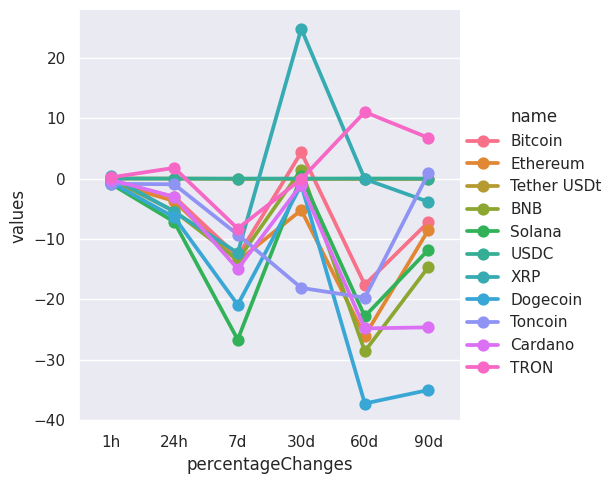

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x='percentageChanges', y='values', hue='name', data=df7, kind='point')

In [131]:
# plt.figure(figsize=(30, 10))  # Adjust width and height as needed
# sns.catplot(x='percentageChanges', y='values', hue='name', data=df7, kind='point')
# plt.show()
df9 = df[['name','quote.USD.price', 'timestamp']]
df9 = df9.query("name == 'Bitcoin'")
df9

,name,quote.USD.price,timestamp
0,Bitcoin,59235.73321,2024-08-04 16:15:56.429994
11,Bitcoin,59235.73321,2024-08-04 16:16:12.187645
21,Bitcoin,59235.73321,2024-08-04 16:16:17.401523
31,Bitcoin,59235.73321,2024-08-04 16:16:22.654352
41,Bitcoin,59058.15253,2024-08-04 16:20:13.956668
51,Bitcoin,59058.15253,2024-08-04 16:20:19.175403
61,Bitcoin,59058.15253,2024-08-04 16:20:24.395543
71,Bitcoin,59058.15253,2024-08-04 16:20:29.650559
81,Bitcoin,59058.15253,2024-08-04 16:20:34.886657
91,Bitcoin,58624.30260,2024-08-04 17:04:55.941555


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

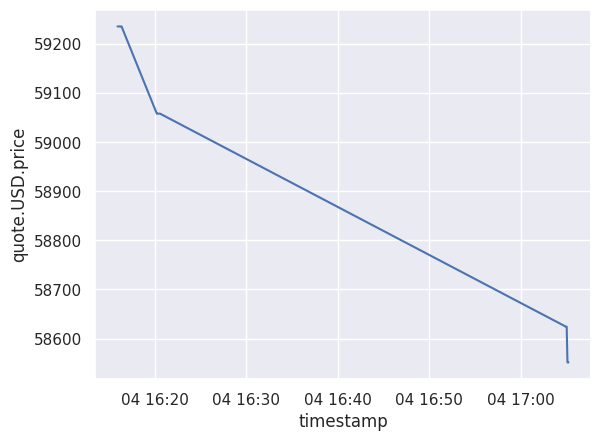

In [134]:
sns.set_theme(style="darkgrid")
sns.lineplot(x='timestamp', y='quote.USD.price', data = df9)